# includes

In [7]:
import mplfinance as mpf
import pandas as pd

from data_proc import DataProc
from capture_plot import CaptureOnClick
# SYMBOLS = ['BTCUSDT', 'ETHUSDT', 'SOLUSDT', 'AVAXUSDT']

TOTAL_CANDLES = 100

from datetime import datetime, timedelta
import os

%matplotlib widget
#%matplotlib inline
#%matplotlib notebook


In [2]:
print(mpf.__version__)

0.12.10b0


# simple flow

## Configure data input

### Presets

- SYMBOLS = 'BTCUSDT', 'ETHUSDT', 'SOLUSDT', 'AVAXUSDT'
- INTERVALS = '1m', '3m', '5m', '15m', '30m', '1h', '2h', '4h', '6h', '8h', '12h', '1d', '3d', '1w', '1M'
- TOTAL_CANDLES = 100
- SYMBOL = 'BTCUSDT'
- DEF_INTERVAL = '1m'

SYMBOLS must be included into data_proc as well to create datastore structure (to be fixed)

In [8]:
#initialize data processor
dp = DataProc('.\\.data\\ntb\\v0.0504a\\')

print(dp)

#### Configure data

In [9]:

#datamap initialized with two entries: BTCUSDT and ETHUSDT, each may hold candles data in corresponding interval from INTERVALS 
datamap = pd.DataFrame(dp.data_map)

#data is accumulated here, (TODO:and updated when needed )
datastore = pd.DataFrame(dp.pair_df_store)

#get one TOTAL_CANDLES set of OCHL+Volume for 
pair_df = pd.DataFrame(datastore['BTCUSDT']['1m'])

#default load:
last_updated = datamap['BTCUSDT']['1m']['Updated']
start_date = datamap['BTCUSDT']['1m']['StartDate']
end_date = datamap['BTCUSDT']['1m']['EndDate']

total_candles = pd

print (f'\nwe have: {TOTAL_CANDLES} candles of {dp.pair} at {dp.interval} loaded on {last_updated} between dates: {start_date} and {end_date} \n')
print(datamap.shape, datastore.shape, pair_df.shape, '\n')
print(pair_df.index[0:5], '\n')
print(pair_df[0:5], '\n')


we have: 100 candles of BTCUSDT at 15m loaded on None between dates: None and None 

(15, 4) (15, 4) (0, 5) 

DatetimeIndex([], dtype='datetime64[ns]', freq=None) 

Empty DataFrame
Columns: [Open, High, Low, Close, Volume]
Index: [] 



#### Load data

In [11]:
pair_df,_,_ = dp.get_data('BTCUSDT', '1h')

print(pair_df)

                         Open      High       Low     Close      Volume
Date                                                                   
2024-01-14 14:00:00  42891.68  43005.25  42790.00  42811.99  1144.92876
2024-01-14 15:00:00  42811.99  42967.97  42804.01  42904.38   875.65217
2024-01-14 16:00:00  42904.39  42965.00  42856.72  42929.95  1007.12731
2024-01-14 17:00:00  42929.94  43010.84  42877.77  42973.27   941.54492
2024-01-14 18:00:00  42973.27  43003.99  42836.00  42900.01   687.20360
...                       ...       ...       ...       ...         ...
2024-01-18 13:00:00  42433.45  42657.16  42362.00  42508.00  1491.62445
2024-01-18 14:00:00  42508.01  42742.00  42428.37  42738.70  1312.17402
2024-01-18 15:00:00  42738.70  42810.00  42611.10  42619.32  1369.13154
2024-01-18 16:00:00  42619.31  42619.32  41736.27  41948.99  4847.44805
2024-01-18 17:00:00  41948.99  42150.00  41648.82  42076.32  1750.53559

[100 rows x 5 columns]


## Aquire selections
* left click places buy mark
* right click places sell mark
* shift+left click removes the nearest mark

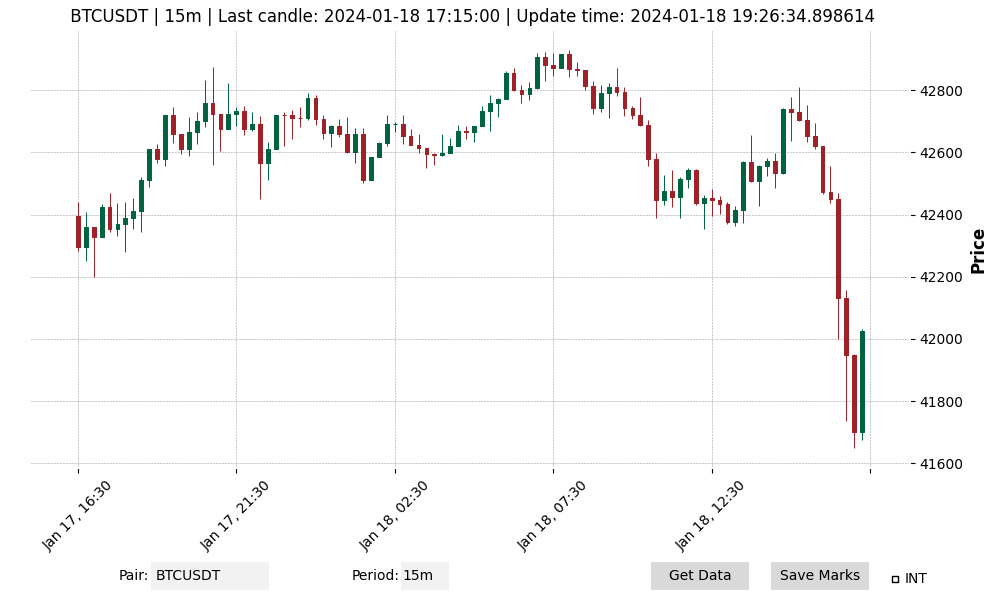

In [12]:
plt = CaptureOnClick(data_proc=dp)
#plotter = CaptureOnClick(pair_df=pair_df, data_proc=dp)

## Utils. 
* Store selections

In [10]:
# Save points to file
# plotter.save_m_to_file()
# plt = plotter_default
print(f'Current pair: {plt.pair} current interval: {plt.interval}')


Current pair: SOLUSDT current interval: 30m


## debug print from chart, on mouse click 

In [12]:
print(plt.captured_output)

Loaded on plot: BTCUSDT at 30m at 2023-12-27 18:30:00Loaded up to: 2023-12-27 18:30:00


In [15]:
df = pd.DataFrame(datamap)

df = df.loc[:, df.notna().any()][:5]

print(df)

                                               BTCUSDT  \
1m   {'StartDate': None, 'EndDate': None, 'Updated'...   
3m   {'StartDate': None, 'EndDate': None, 'Updated'...   
5m   {'StartDate': None, 'EndDate': None, 'Updated'...   
15m  {'StartDate': 2023-12-26 17:45:00, 'EndDate': ...   
30m  {'StartDate': 2023-12-25 17:00:00, 'EndDate': ...   

                                               ETHUSDT  \
1m   {'StartDate': None, 'EndDate': None, 'Updated'...   
3m   {'StartDate': None, 'EndDate': None, 'Updated'...   
5m   {'StartDate': None, 'EndDate': None, 'Updated'...   
15m  {'StartDate': None, 'EndDate': None, 'Updated'...   
30m  {'StartDate': None, 'EndDate': None, 'Updated'...   

                                               SOLUSDT  \
1m   {'StartDate': None, 'EndDate': None, 'Updated'...   
3m   {'StartDate': None, 'EndDate': None, 'Updated'...   
5m   {'StartDate': None, 'EndDate': None, 'Updated'...   
15m  {'StartDate': None, 'EndDate': None, 'Updated'...   
30m  {'Start

In [10]:
del plt